In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

Parameters:  Index(['Intercept', 'Fore', 'Bicep', 'Chest', 'Neck', 'Shoulder', 'Waist',
       'Height', 'Calf', 'Thigh', 'Head'],
      dtype='object')
Parameters:  [ -6.95171351e+01   1.78181867e+00   1.55090402e-01   1.89135439e-01
  -4.81837053e-01  -2.93123483e-02   6.61441244e-01   3.17846448e-01
   4.45890184e-01   2.97212313e-01  -9.19562670e-01]


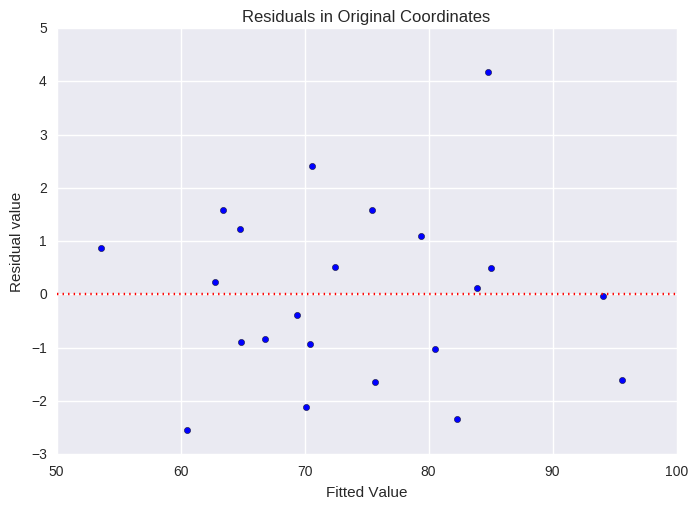

In [3]:
p_d = pd.read_csv('physical.txt',sep='\t',header=0)

# This line constructs the linear regression. Mass is a function of Fore + Bicep + ...
# Result just calculates the coefficents and the Intercept along with 
# R value among other things.
result = smf.ols(formula='Mass ~ Fore + Bicep + Chest + Neck + Shoulder + Waist + Height + Calf + Thigh + Head', data=p_d).fit()


print('Parameters: ', result.params.keys())
print('Parameters: ', result.params.values)

#Vals_zero is just a dictionary that contains the coefficents. I'm constructing the prediction(s).
vals_zero = result.params
pred = vals_zero['Intercept'] + (p_d['Fore'] * vals_zero['Fore']) +  (p_d['Bicep'] * vals_zero['Bicep']) +  (p_d['Chest'] * vals_zero['Chest']) \
+ (p_d['Neck'] * vals_zero['Neck']) + (p_d['Shoulder'] * vals_zero['Shoulder']) + (p_d['Waist'] * vals_zero['Waist']) + (p_d['Height'] * vals_zero['Height']) \
+ (p_d['Calf'] * vals_zero['Calf']) + (p_d['Thigh'] * vals_zero['Thigh']) + (p_d['Head'] * vals_zero['Head'])

# This is the 
plt.figure()
#plt.xscale('linear')
#plt.yscale('linear')
plt.axhline(y=0, color='r', linestyle='dotted')

plt.scatter(pred, p_d['Mass'] - pred) # Residual = Observed (y) - Expected (regression)
plt.title('Residuals in Original Coordinates')
plt.xlabel('Fitted Value')
plt.ylabel('Residual value')
plt.show()

#ax = sns.regplot('Mass', 'aDelay', local, fit_reg=False, label='Data')



Parameters:  Index(['Intercept', 'Fore', 'Bicep', 'Chest', 'Neck', 'Shoulder', 'Waist',
       'Height', 'Calf', 'Thigh', 'Head'],
      dtype='object')
Parameters:  [  1.11922878e+00   2.79718943e-02   4.14371304e-03   1.05188684e-03
  -2.53206076e-03   8.10026998e-04   1.11523281e-02   5.77383070e-03
   1.06564548e-02   7.91884117e-03  -1.24520118e-02]
0     4.228078
1     4.398201
2     3.974165
3     4.291119
4     4.315767
5     4.554176
6     4.025113
7     4.111705
8     3.979897
9     3.920224
10    4.127942
11    4.161916
12    4.233046
13    4.116723
14    4.347140
15    4.056973
16    3.792087
17    4.012857
18    4.384401
19    4.122105
20    4.386336
21    4.580509
dtype: float64


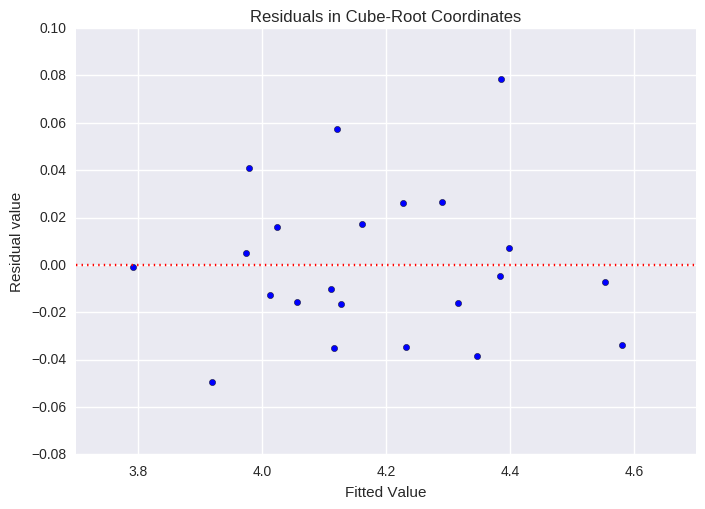

In [4]:
#Apply the cube root to the 
cbr = lambda x : np.power(x, 1/3)
mod_df = p_d.copy(deep=True)
mod_df['Mass'] = mod_df['Mass'].apply(cbr)

result = smf.ols(formula='Mass ~ Fore + Bicep + Chest + Neck + Shoulder + Waist + Height + Calf + Thigh + Head', data=mod_df).fit()


print('Parameters: ', result.params.keys())
print('Parameters: ', result.params.values)

vals = result.params.values
pred = vals[0] + mod_df['Fore'] * vals[1] +  mod_df['Bicep'] * vals[2] +  mod_df['Chest'] * vals[3] \
+ mod_df['Neck'] * vals[4] + mod_df['Shoulder'] * vals[5] + mod_df['Waist'] * vals[6] + mod_df['Height'] * vals[7] \
+ mod_df['Calf'] * vals[8] + mod_df['Thigh'] * vals[9] + mod_df['Head'] * vals[10]

print(pred)
plt.figure()
#plt.xscale('linear')
#plt.yscale('linear')
plt.axhline(y=0, color='r', linestyle='dotted')

plt.scatter(pred, mod_df['Mass'] - pred) # Residual = Observed (y) - Expected (regression)
plt.title('Residuals in Cube-Root Coordinates')
plt.xlabel('Fitted Value')
plt.ylabel('Residual value')
plt.show()



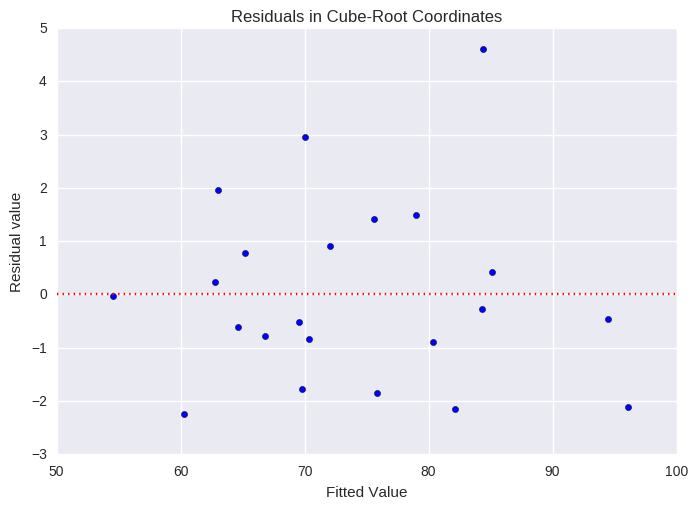

In [5]:
pred = vals[0] + mod_df['Fore'] * vals[1] +  mod_df['Bicep'] * vals[2] +  mod_df['Chest'] * vals[3] \
+ mod_df['Neck'] * vals[4] + mod_df['Shoulder'] * vals[5] + mod_df['Waist'] * vals[6] + mod_df['Height'] * vals[7] \
+ mod_df['Calf'] * vals[8] + mod_df['Thigh'] * vals[9] + mod_df['Head'] * vals[10]

pred2 = np.power(pred.values, 3)

plt.figure()

#plt.xscale('linear')
#plt.yscale('linear')
plt.axhline(y=0, color='r', linestyle='dotted')

plt.scatter(pred2, p_d['Mass'] - pred2) # Residual = Observed (y) - Expected (regression)
plt.title('Residuals in Cube-Root Coordinates')
plt.xlabel('Fitted Value')
plt.ylabel('Residual value')
plt.show()
